In [4]:
'''Minimizer in Python''' ###import util you dumby
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as web
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as spo



from matplotlib import style


X = [2.], Y = [0.75]
X = [2.], Y = [0.75]
X = [2.00000001], Y = [0.75000001]
X = [0.99999999], Y = [0.75000001]
X = [1.5], Y = [0.5]
X = [1.5], Y = [0.5]
X = [1.50000001], Y = [0.5]
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.5
            Iterations: 2
            Function evaluations: 7
            Gradient evaluations: 2
Minima found at:
X = [1.5], Y = 0.5
X = [0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2
 2.3 2.4 2.5], Y = [1.5  1.31 1.14 0.99 0.86 0.75 0.66 0.59 0.54 0.51 0.5  0.51 0.54 0.59
 0.66 0.75 0.86 0.99 1.14 1.31 1.5 ]


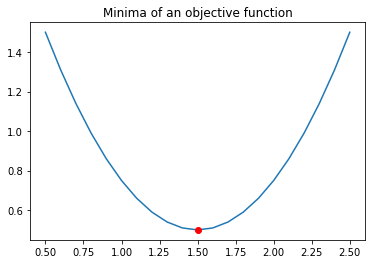

In [5]:
'''Lesson 9.3 \'Minimizer in Python' '''

def f(X):# function to minimize
    '''Given a scalar X, return some value (a real number)'''
    Y = (X - 1.5)**2 + 0.5
    print ("X = {}, Y = {}".format(X, Y)) # for tracking attempts
    return Y
def test_run():
    Xguess = 2
    min_result = spo.minimize(f, Xguess, method='SLSQP', options ={'disp':True})#minimizer
    print ("Minima found at:")
    print ("X = {}, Y = {}".format(min_result.x, min_result.fun))
    
    #plot function values, mark minima
    Xplot = np.linspace(0.5, 2.5, 21) #(x1,x(-1), divisions)
    Yplot = f(Xplot)
    plt.plot(Xplot, Yplot) #plots the function
    plt.plot(min_result.x, min_result.fun, 'ro')
    plt.title("Minima of an objective function")
    plt.show()
    
if __name__=='__main__':
    test_run()

In [6]:
'''9.9 Fit a line to given data points'''
def error(line, data): #what function minimizer is trying to minimize
    '''Compute error between give line model and observed data.
    -----------
    Parameters
    line: tuple/list/array (C0, C1) where C0 is slope and C1 is Y-intercept
    data: 2D array where each row is a point (x,y)
    
    Returns error as a single real value.
    '''
    #Metric: Sum of squared Y-axis differences
    
    err = np.sum((data[:,1] - (line[0] * data[:,0] + line[1])) ** 2) #(<real_data> minus the <estimate>)
    return err 


def fit_line(data, error_func): 
    '''Fit a line to given data, using a supplied error function.
    Parameters 
    ----------
    data: 2D array where each row is a point (X0, Y)
    error_func: fuction that computes the error between a line and observed data
    Returns line that minimizes the error function.
    '''
    # Generate intial guess for line model
    l = np.float32([0, np.mean(data[:, 1])]) #slope = 0, intercept = mean(y values..)

    #Plot initial guess (optional)
    x_ends = np.float32([-5, 5])
    plt.plot(x_ends, l[0] * x_ends,  l[1], 'm--', linewidth=2.0, label='Initial guess')
    
    # Call optimizer to minimize erro function
    result = spo.minimize(error, l, args =(data,), method='SLSQP', options={'disp':True})
    return result.x


def test_run():
    data = pd.csv_read()
    # Define original line
    l_orig = np.float32([4, 2]) #(<C0>,<C1>) 2 element array slope=4, y-int=2
    print ("Original line: C0 = {},  C1 = {}".format(l_orig[0], l_orig[1]))
    Xorig = np.linspace(0, 10, 21) #generating x values -minimizer doesn't know
    Yorig = l_orig[0] * Xorig + l_orig[1] #generating y values-minimizer doesn't know
    plt.plot(Xorig, Yorig, 'b--', linewidth=2.0, label="Original line")
    
    #Generate noisy data points
    noise_sigma = 3.0
    noise = np.random.normal(0, noise_sigma, Yorig.shape)
    data = np.asarray([Xorig, Yorig + noise]).T # adding noise
    plt.plot(data[:,0], data[:,1], 'go', label="Data points")
    
    # try to fit a line to this data
    l_fit = fit_line(data, error) #optimizer runs
    print ("Fitted line: C0 ={}, C1 = {}".format(l_fit[0], l_fit[1]))
    plt.plot(data[:, 0], l_fit[0] * data[:, 0] + l_fit[1], 'r--', linewidth=2.0, label="fit_line")
   
    #Add axis labels and legend
    plt.legend(loc='upper left')
    
if __name__=='__main__':
    test_run()

AttributeError: module 'pandas' has no attribute 'csv_read'

In [ ]:
''' https://github.com/ChakoChen/Machine-Learning-for-Trading 

compare: 
    https://github.com/joelowj/Machine-Learning-and-Reinforcement-Learning-in-Finance
'''
def error_poly(C, data):
    """Compute error between given polynomial and observed data.
    Parameters
    ----------
    C: numpy.poly1d object or equivalent array representing polynomial coefficients
    data: 2D array where each row is a point (x, y)
    Returns error as a single real value.
    """
    y = data[:, 1]
    x = data[:, 0]
    
    # Metric: Sum of squared Y-axis differences
    err = np.sum((y - np.polyval(C, x)) ** 2)
    return err


def fit_poly(data, error_func, degree=4):
    """Fit a polynomial to given data, using supplied error function.
    Parameters
    ----------
    data: 2D array where each row is a point (x, y)
    error_func: function that computes the error between a polynomial and observed data
    Returns polynomial that minimizes the error function.
    """

    # Generate initial guess for polynomial model 
    Cguess = np.poly1d(np.ones(degree + 1, dtype=np.float32)) #(all coeffs = 1)

    # Plot initial guess (optional)
    x = np.linspace(-6, 6, 21)
    plt.plot(x, np.polyval(Cguess, x), 'm--', linewidth=2.0, label="Initial guess")

    # Call optimizer to minimize error function
    result = spo.minimize(error_poly, Cguess, args=(data,), method='SLSQP', options={'disp': True})
    return np.poly1d(result.x)  # convert optimal result into a poly1d obeject and return


def test_run():
    # Define original polynomial
    Corig = np.poly1d([1.5, -10, -5, 60, 50])
    print('Og poly:\n', np.poly1d(Corig))
#     print("Original polynomial: {}*x^4 + {}*x^3 + {}*x^2 + {}*x + {}".format(Corig[4], Corig[3], Corig[2], Corig[1], Corig[0]))
    Xorig = np.linspace(-6, 6, 21)
    Yorig = np.polyval(Corig, Xorig)
    plt.plot(Xorig, Yorig, 'b--', linewidth=2.0, label="Original polynomial")

    # Generate noisy data points
    noise_sigma = 30.0
    noise = np.random.normal(0, noise_sigma, Yorig.shape)
    data = np.asarray([Xorig, Yorig + noise]).T  # Convert the input to an array, then transpose
    plt.plot(data[:, 0], data[:, 1], 'go', label="Data points")

    # Try to fit a polynomial to this data
    Cfit = fit_poly(data, error_poly)
    print("Fitted polynomial:\n", np.poly1d(Cfit))
    #print("Fitted polynomial: {}*x^4 + {}*x^3 + {}*x^2 + {}*x + {}".format(Cfit[4], Cfit[3], Cfit[2], Cfit[1], Cfit[0]))
    plt.plot(data[:, 0], np.polyval(Cfit, data[:, 0]), 'r--', linewidth=2.0, label="Fitted polynomial")

    # Add a legend and show plot
    plt.legend()
    plt.show()


if __name__ == "__main__":
    test_run()